# Comparing Merton & Vasicek Model implied yeild curves

In [1]:
import random_number as rn
from matplotlib import pyplot as plt
import short_rate_model as srm
import numpy as np
import scipy.stats as stats
import math

In [2]:
RNG1 = rn.RandomGen()
RNG2 = rn.RandomGen()

In [3]:
r0 = 0.05
vol = 0.02

# Merton
drift = 0.01

# Vasicek
speed = 0.1
long_term_mean = 0.02

merton = srm.Merton(r0, drift, vol, RNG1)
vasicek = srm.Vasicek(r0, speed, long_term_mean, vol, RNG2)

In [4]:
t = 20.

rates_M = merton.short_rate(t, 3000)
rates_V = vasicek.short_rate(t, 3000)

mean_M, variance_M = merton.short_rate_moments(t)
mean_V, variance_V = vasicek.short_rate_moments(t)

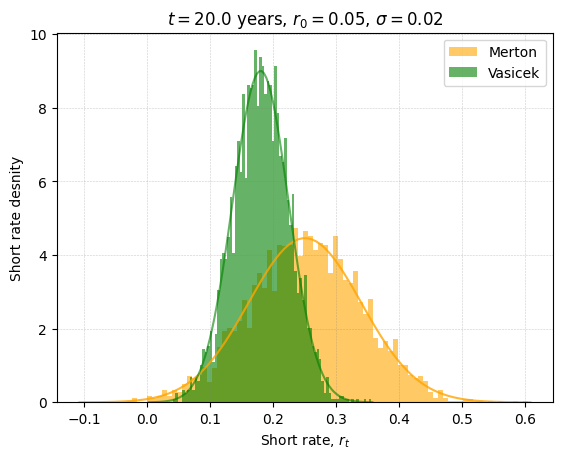

In [5]:
sigma_M = np.sqrt(variance_M)
x_M = np.linspace(mean_M - 4*sigma_M, mean_M + 4*sigma_M, 100)

sigma_V = np.sqrt(variance_V)
x_V = np.linspace(mean_V - 4*sigma_V, mean_V + 4*sigma_V, 100)

plt.figure()
plt.title(fr"$t =${t} years, $r_0=${r0}, $\sigma=${vol}")
plt.plot(x_M, stats.norm.pdf(x_M, mean_M, sigma_M), color='orange', alpha=0.8)
plt.hist(rates_M, bins=80, alpha=0.6, density=True, label="Merton", color='orange')
plt.plot(x_V, stats.norm.pdf(x_V, mean_V, sigma_V), color='green', alpha=0.6)
plt.hist(rates_V, bins=80, alpha=0.6, density=True, label="Vasicek", color='green')
plt.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
plt.legend()
plt.xlabel(r"Short rate, $r_t$")
plt.ylabel(r"Short rate desnity")
plt.show()

In [6]:
Ts = np.linspace(0.0001, 80, 200)

ZCBs_M = [merton.df(0,T,1) for T in Ts]
yeilds_M = [merton.bond_yield(0,T,1) for T in Ts]

ZCBs_V = [vasicek.df(0,T,1) for T in Ts]
yeilds_V = [vasicek.bond_yield(0,T,1) for T in Ts]

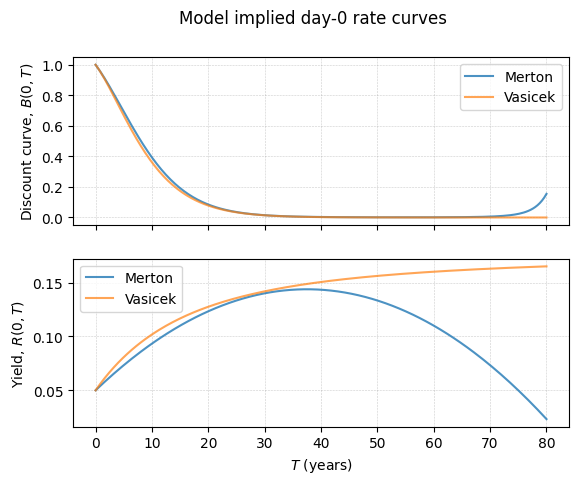

In [13]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Model implied day-0 rate curves')
plt.xlabel(r'$T$ (years)')

ax1.plot(Ts, ZCBs_M, label='Merton', alpha=0.8)
ax1.plot(Ts, ZCBs_V, label='Vasicek', alpha=0.7)
ax1.set(ylabel=r'Discount curve, $B(0,T)$')

ax2.plot(Ts, yeilds_M, label='Merton', alpha=0.8)
ax2.plot(Ts, yeilds_V, label='Vasicek', alpha=0.7)
ax2.set(xlabel=r'$T$ (years)', ylabel=r'Yield, $R(0,T)$')

ax1.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
ax2.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
ax1.legend()
ax2.legend()

plt.show()